### Neural Network 란
 - 신경 (Neural) 을 망 (Network) 처럼 연결 시켜서 예측을 수행하게 하는 것.
 - 신경망을 이해하려면 우선 신경에 대한 이해가 필요합니다.
 - 신경은 아래와 같은 연산을 합니다.
  - z=w1​x1​ + w2​x2 ​+ ... + wn​xn ​+b
  - 여기서 이 계산은 행렬로 표현이 가능합니다. 이렇게 행렬로 표현하게 되면 Z = WX + B 의 형태의 행렬이 됩니다.
  - 그리고 신경과 신경 사이에 비선형 함수 (활성화 함수, σ) 를 한번 더 적용합니다.
  - y=σ(WX + B)
  - 위와 같은 수식으로 표현 할 수 있으며, 활성화 함수는 여러 종류가 있기 때문에 나중에 하나씩 다뤄보겠습니다.
    - 우선은 ReLU 계열의 함수를 많이 사용한다는 것만 알아두고 있으면 좋습니다.

In [ ]:
# 뉴런 하나 구현하기
# 아직 pytorch 를 사용하지 않습니다.
# numpy만을 사용해서 실제로 구현 합니다.

import numpy as np

# 외부에서 호출 받을 때, x, w, b 를 외부에서 넘겨받은 값을 씁니다.
# 호출시에 neuron(5, 3, 6) 과 같이 들어가있으면 해당 함수 내에서 x==5, w==3, b==6 으로 동작하게 됩니다.
def neuron(x, w, b):
    """
      우선 활성화함수는 여기서 사용하지 않겠습니다.
      result = x * w + b 의 형태가 되어야 하며, x, w 는 행렬 (matrix) 이며, b는 상수입니다. (하지만 이 값도 역시 선형 벡터일 수 있습니다.)
      기본적으로 x는 입력값이고, w, b는 학습이 되는 값인데, w는 x와 곱해지는 값으로 가중치 (weight) 라고 하고
      b는 x 와 곱해진 w 값에 더하는 값으로 편향 (bias) 라고 합니다.
    """
    # np.dot 은 벡터의 내적을 구하는 함수.
    z = np.dot(w, x) + b
    return z

x = np.array([2.0, 3.0])
w = np.array([0.5, -1.5])
b = 0.2

output = neuron(x, w, b)
print("뉴런 출력", output)

뉴런 출력 -3.3


In [12]:
w = np.array([0.5, -1.5])
b = 0.2
initial_w = w.copy()
initial_b = b

print("초기 w =", initial_w)
print("초기 b =", initial_b)


# 데이터 생성
N = 200
X = np.random.uniform(-1, 1, (N, 2))
true_w = np.array([3.0, 2.0])
true_b = -1.0

Z = np.dot(X, true_w) + true_b
Y = (Z > 0).astype(np.float32)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

초기 w = [ 0.5 -1.5]
초기 b = 0.2


In [ ]:
lr = 0.1

for epoch in range(1, 301):
    # 우선은 Full Batch 로 진행
    # 현실 문제를 풀때는 실제로는 Full Batch 를 진행 할 수 없음...
    # 데이터도 너무 많고, 모델도 너무 크기 때문.
    # 그래서 mini-batch 를 구성해서 그 mini-batch 를 사용해서 batch를 돈다. 
    z = np.array([neuron(x, w, b) for x in X])
    pred = sigmoid(z)

    # 지금 예상치가 결과와 얼마가 차이나는지 loss 를 구한다.
    # loss 는 MSE (Mean Square Error) 사용
    loss = np.mean((pred - Y) ** 2)
    # 해당 dLoss 는 위의 loss 를 직접 미분한 결과.
    # 즉 변화율 (미분값) 을 얼마나 쫓아 갈 것이냐가 핵심이다.
    dLoss = 2 * (pred - Y) / N

    # 해당 미분된 loss 를 사용해서, 해당 값을 업데이트 함. w와 d가 얼마나 변해야할지 정함.
    dw = np.dot(dLoss, X)       # shape (2,)
    db = np.sum(dLoss)          # scalar

    w -= lr * dw
    b -= lr * db

    if epoch % 50 == 0:
        print(f"[Epoch {epoch}] loss={loss:.4f}, w={w}, b={b:.4f}")

print("\n학습 종료!")
print("학습된 w =", w)
print("학습된 b =", b)


[Epoch 50] loss=0.1252, w=[1.53536735 0.11116084], b=-0.7513
[Epoch 100] loss=0.0781, w=[2.17526498 0.93650412], b=-0.9984
[Epoch 150] loss=0.0606, w=[2.65354357 1.44475956], b=-1.1613
[Epoch 200] loss=0.0517, w=[3.04291146 1.80324671], b=-1.2915
[Epoch 250] loss=0.0462, w=[3.3742614  2.07911842], b=-1.4011
[Epoch 300] loss=0.0424, w=[3.66399344 2.3039816 ], b=-1.4960

학습 종료!
학습된 w = [3.66399344 2.3039816 ]
학습된 b = -1.4959597742879136


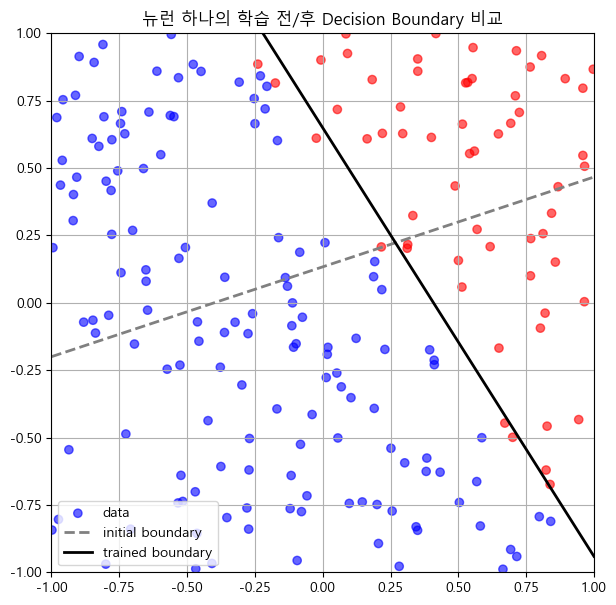

In [14]:
def line(x, w, b):
    return -(w[0]/w[1]) * x - b / w[1]

xs = np.linspace(-1, 1, 100)

plt.figure(figsize=(7, 7))

# 데이터 점
plt.scatter(X[:,0], X[:,1], c=Y, cmap='bwr', alpha=0.6, label="data")

# 초기 직선
plt.plot(xs, line(xs, initial_w, initial_b),
         '--', linewidth=2, color='gray', label="initial boundary")

# 학습된 직선
plt.plot(xs, line(xs, w, b),
         '-', linewidth=2, color='black', label="trained boundary")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.legend()
plt.title("뉴런 하나의 학습 전/후 Decision Boundary 비교")
plt.show()

위 처럼 뉴런이 하나라면, 반드시 선형 데이터밖에 분류할 수 없습니다.

뉴런이 받는 input의 크기와는 상관이 없습니다.

이것을 해결하기 위해서라면 결국, 여러 뉴런을 쌓아햐 하는데요.

문제는 여러 뉴런을 쌓으면, loss를 사용해서 미분을 어떻게 해야하는지 막히게 됩니다.

왜 여러 뉴런이 복잡해지게 되느냐, 


뉴런이 하나일때 loss는

```
x(입력) → neuron → pred(예측값) → loss
```

이렇게 한 경로만 따라가게 됩니다.


뉴런이 2개가 되는순간...

```
          (w1,b1) → h1 →  
x → Hidden                → Output → Loss
          (w2,b2) → h2 →  

```

w1 의 기여도를 확인하기 위해서는 ​​아까보다 훨씬 많은 연산량이 필요하게 됩니다.

뉴런끼리 연결되어있는 fully-connect 된 경우

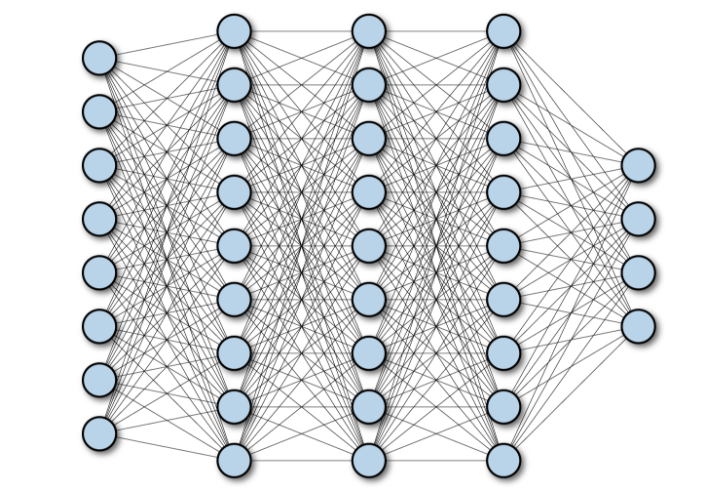

이런 모델은 하나를 이런 방식으로 미분하기 위해서는 뒤의 모든 신경들의 chain rule 을 고려해야하고

각각의 신경들이 이걸 모두 고려해야해서

입력값에 가까울수록 미분이 현실적으로 불가능합니다.

즉 다층 뉴런은 새로운 알고리즘을 필요로 합니다. 이것은 다음장인 back propagation 을 통해서 알아보겠습니다.